In [129]:
#Import libraries
import geopandas
import pandas as pd
import descartes
from descartes.patch import PolygonPatch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN


## Plot hospitals using lat/long

In [105]:
#Read in hospitals csv file
df = pd.read_csv('./hospitals.csv')


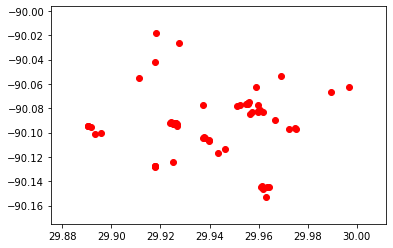

In [106]:
plt.scatter(df['lat'],df['lng'],c='red')


## Using KMeans clustering group hospitals near each other.

In [107]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=42)
km.fit(df[['lat','lng']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [108]:
set(km.labels_)


{0, 1, 2, 3, 4}

In [109]:
df['kmcluster'] = km.labels_


In [110]:
km.cluster_centers_


array([[ 29.92895417, -90.10597702],
       [ 29.96236273, -90.14611722],
       [ 29.96253822, -90.07875791],
       [ 29.91865128, -90.03545122],
       [ 29.89212652, -90.09665297]])

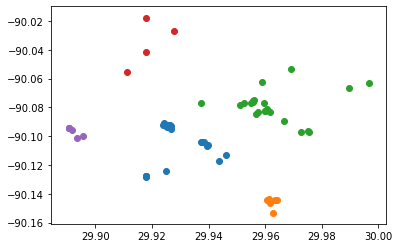

In [117]:
ax1 = plt.scatter(df[df["kmcluster"] == 0]["lat"], df[df["kmcluster"] == 0]["lng"])
ax2 = plt.scatter(df[df["kmcluster"] == 1]["lat"], df[df["kmcluster"] == 1]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 2]["lat"], df[df["kmcluster"] == 2]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 3]["lat"], df[df["kmcluster"] == 3]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 4]["lat"], df[df["kmcluster"] == 4]["lng"])

## Attempt using geopandas

In [5]:
#Create geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['lng'], df['lat']))


In [6]:
print(gdf.head())


                                geometry                               name  \
0         POINT (-90.1280718 29.9177486)    Children's Hospital New Orleans   
1         POINT (-90.0955094 29.8917868)      West Jefferson Medical Center   
2         POINT (-90.0758301 29.9556817)              Tulane Medical Center   
3  POINT (-90.09286729999999 29.9266229)  Internal Medicine Specialist Inc.   
4         POINT (-90.1276848 29.9177892)                             CHNOLA   

                                   vicinity  \
0        200 Henry Clay Avenue, New Orleans   
1    1101 Medical Center Boulevard, Marrero   
2           1415 Tulane Avenue, New Orleans   
3         3525 Prytania Street, New Orleans   
4  5720, 200 Henry Clay Avenue, New Orleans   

                                               types        lat        lng  
0  ['hospital', 'point_of_interest', 'establishme...  29.917749 -90.128072  
1  ['hospital', 'point_of_interest', 'establishme...  29.891787 -90.095509  
2  ['hospit

In [7]:
geopandas.datasets.available


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [13]:
new_orleans = geopandas.read_file('./Neighborhood_Statistical_Areas.shx')


In [42]:
ss=StandardScaler()
loc_df = pd.DataFrame(ss.fit_transform(df[['lat','lng']]),columns=['lat','lng'])


In [51]:
world['geometry']


RangeIndex(start=0, stop=72, step=1)

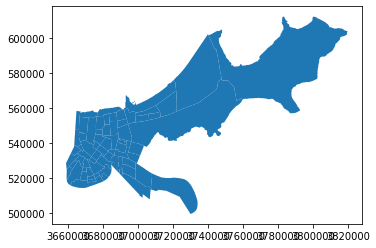

In [33]:
world.plot()
gdf.plot(ax=ax, color='red')


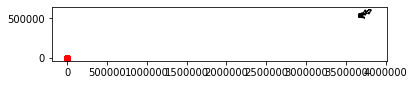

In [21]:
# We restrict to South America.
ax = world.plot(color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()


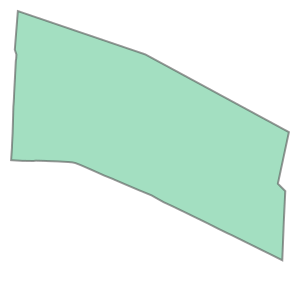

In [100]:
world['geometry'][0]
